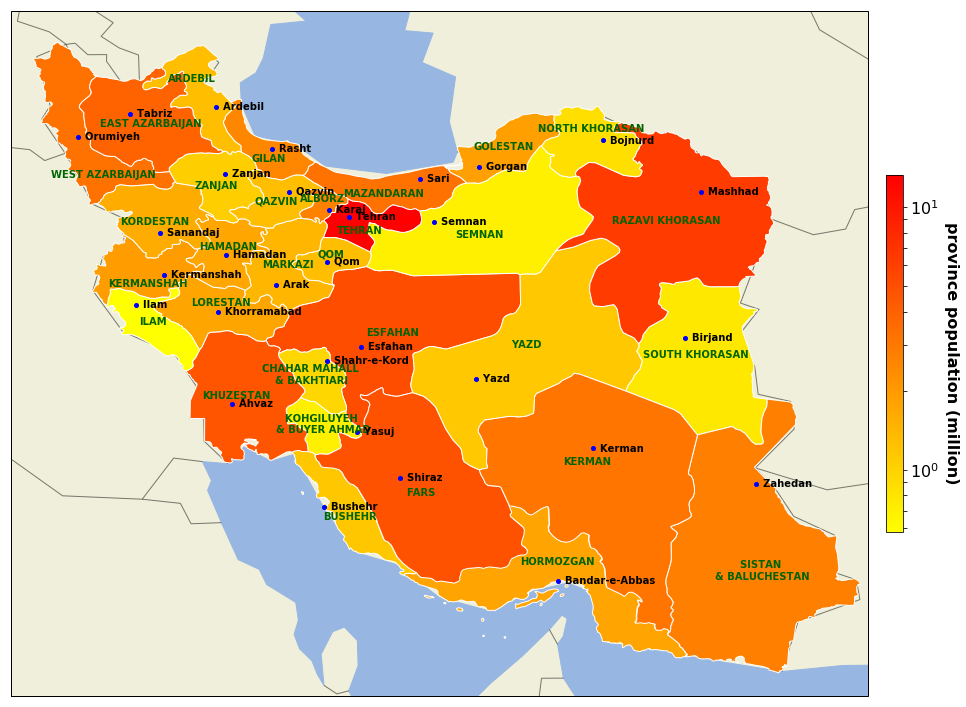

In [159]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as pl
import cartopy
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
from matplotlib.ticker import LogFormatter 
import matplotlib.cm as cm
import matplotlib.colors as mpc
import numpy as np
import re

shpfilename = 'data/ne_10m_admin_1_states_provinces/ne_10m_admin_1_states_provinces.shp'  # http://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_1_states_provinces.zip
ProvinceInformation = 'data/ProvincePopulationsAndCoords.xlsx' # Downloaded from http://www.statoids.com/uir.html and merged with coordinates from google geocode (used google api) 
Capitals = pd.read_excel(ProvinceInformation,index_col=0)
reader = shpreader.Reader(shpfilename)
provinces = [province for province in reader.records() if province.attributes['admin'] == 'Iran']

fig = pl.figure(figsize=(16,16))
ax = pl.axes(projection=ccrs.PlateCarree())
coords = (32.5,53.5) # Iran's geographic coordinates (N, E)
L = (8,10) # Size of the box to show (N, E)
ax.set_extent([coords[1]-L[1], coords[1]+L[1], coords[0]-L[0], coords[0]+L[0]])

ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS, linestyle='-', alpha=.5)
ax.add_feature(cartopy.feature.LAKES, alpha=0.95)

norm = mpc.LogNorm(vmin=Capitals['Pop-2016'].min()/1e6,vmax=Capitals['Pop-2016'].max()/1e6, clip=True)
sm = cm.ScalarMappable(norm=norm, cmap=cm.autumn_r)
sm._A = []

for province in provinces:
    if province.attributes['name'] not in Capitals.index:  # Skip fields which are not provinces (islands, etc.)
        continue
        
    provincecolor = sm.to_rgba(Capitals.loc[province.attributes['name'],'Pop-2016']/1e6)
    capital = Capitals.loc[province.attributes['name']]
    
    ax.add_geometries(province.geometry, ccrs.PlateCarree(),  # Add province
                      facecolor=provincecolor,edgecolor='white',
                      label=province.attributes['name'])
    
    y = float(province.attributes['latitude'])  # Latitude of province name
    if np.abs(y-capital['latitude'])<0.2: # To avoid city and province names overlapping
        y+=0.15*np.sign(y-capital['latitude'])
        
    pl.text(province.attributes['longitude'],y,   # Province name
            re.sub('AND ','\n& ',province.attributes['name'].upper()),
            color='darkgreen',ha='center',
            va='center',fontsize=10,fontweight='bold')
    
    pl.plot(capital['longitude'],capital['latitude'],'bo',markersize=4) # Capital city
    
    pl.text(capital['longitude'],  # Capital city's name
        capital['latitude'],
        '  '+capital['Capital'],
        color='black',ha='left',
        va='center',fontsize=10,fontweight='bold')


        

cb = pl.colorbar(sm,fraction=0.02, pad=0.02);
cb.ax.tick_params(labelsize=16);
cb.ax.set_ylabel('province population (million)', labelpad=20,rotation=270,fontsize=16,fontweight='bold');